In [60]:
# i have two files weather.pk and hotels.pk

#i want to visualize the two time datasets in plotly

import plotly.graph_objects as go
import pickle
import pandas as pd
import numpy as np
# inport minmaxscaler
from sklearn.preprocessing import MinMaxScaler

with open('hotels.pk', 'rb') as f:
    hotels = pickle.load(f)




C:\Users\miror\AppData\Local\Temp\ipykernel_17716\1402657915.py:13: DeprecationWarning:

numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.



In [61]:
hotels

Location       Revenue        Demand  Occupancy
Date                                                      
2013-01-01  NewYork  2.442363e+06  13063.675000  81.991307
2013-01-02  NewYork  2.018559e+06  13069.608539  82.028548
2013-01-03  NewYork  1.927676e+06  13069.608539  82.028548
2013-01-04  NewYork  1.781664e+06  12653.271887  79.415502
2013-01-05  NewYork  1.824994e+06  12827.322364  80.507892
...             ...           ...           ...        ...
2020-10-27   Boston  3.677701e+05   4088.585207  36.830783
2020-10-28   Boston  3.714373e+05   4146.115033  37.349023
2020-10-29   Boston  3.821449e+05   4241.336814  38.206800
2020-10-30   Boston  4.711593e+05   4728.356546  42.593969
2020-10-31   Boston  5.129476e+05   5067.584140  45.649799

[23254 rows x 4 columns]

In [62]:
str(list(hotels.columns))

"['Location', 'Revenue', 'Demand', 'Occupancy']"

In [63]:
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

# Assuming 'location' column exists in the hotels dataframe
locations = hotels['Location'].unique()

col_list = ['Revenue', 'Demand', 'Occupancy']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Create subplots
fig = make_subplots(rows=len(locations), cols=1, shared_xaxes=True, subplot_titles=locations)

for i, location in enumerate(locations):
    location_data = hotels[hotels['Location'] == location]
    location_normalized = pd.DataFrame(scaler.fit_transform(location_data[col_list]), columns=col_list, index=location_data.index)
    
    for col in col_list:
        fig.add_trace(go.Scatter(x=location_normalized.index, y=location_normalized[col], mode='lines', name=f"{location} - {col}"), row=i+1, col=1)

fig.update_layout(height=300*len(locations), title_text="Normalized Data for Each Location")
fig.show()

In [64]:
import plotly.express as px

# Iterate through each location
for location in locations:
    location_data = hotels[hotels['Location'] == location]
    
    # Compute the correlation matrix, excluding the 'Location' column
    corr_matrix = location_data[col_list].corr()
    
    # Plot the correlation matrix
    fig = px.imshow(corr_matrix, text_auto=True, title=f'Correlation Matrix for {location}')
    fig.show()

In [65]:
for location in locations:
    location_data = hotels[hotels['Location'] == location]
    corr_matrix = location_data[col_list].corr()
    revenue_corr = corr_matrix['Revenue'][1:]
    print(f"Correlations for Revenue in {location}:\n{revenue_corr}\n")

Correlations for Revenue in NewYork:
Demand       0.820324
Occupancy    0.814697
Name: Revenue, dtype: float64

Correlations for Revenue in Orlando:
Demand       0.922884
Occupancy    0.923323
Name: Revenue, dtype: float64

Correlations for Revenue in Chicago:
Demand       0.965153
Occupancy    0.939151
Name: Revenue, dtype: float64

Correlations for Revenue in LosAngeles:
Demand       0.953954
Occupancy    0.804397
Name: Revenue, dtype: float64

Correlations for Revenue in Washington:
Demand       0.953354
Occupancy    0.942405
Name: Revenue, dtype: float64

Correlations for Revenue in Atlanta:
Demand       0.954125
Occupancy    0.852712
Name: Revenue, dtype: float64

Correlations for Revenue in Dallas:
Demand       0.975022
Occupancy    0.807669
Name: Revenue, dtype: float64

Correlations for Revenue in Boston:
Demand       0.967306
Occupancy    0.919212
Name: Revenue, dtype: float64



In [66]:
max_corr = 0
max_corr_city = None

for location in locations:
    location_data = hotels[hotels['Location'] == location]
    corr_matrix = location_data[col_list].corr()
    revenue_corr = corr_matrix['Revenue'][1:].mean()  # Get the highest correlation with Revenue (excluding itself)
    
    if revenue_corr > max_corr:
        max_corr = revenue_corr
        max_corr_city = location

print(f"The city with the highest correlation between revenue and demand/occupancy is {max_corr_city} with a correlation of {max_corr:.2f}")

The city with the highest correlation between revenue and demand/occupancy is Chicago with a correlation of 0.95


# city choice


In [67]:
city = "Chicago"

In [68]:
# Filter data for city and the specified date range
city_data = hotels[(hotels['Location'] == city) & (hotels.index >= '2013-01-01') & (hotels.index <= '2019-12-31')]
city_data

Location       Revenue        Demand  Occupancy
Date                                                      
2013-01-01  Chicago  2.951577e+05   3743.434144  21.615857
2013-01-02  Chicago  4.063731e+05   5084.982568  29.362412
2013-01-03  Chicago  4.634825e+05   5746.181491  33.180399
2013-01-04  Chicago  4.456745e+05   5672.602952  32.755532
2013-01-05  Chicago  4.707488e+05   5894.346493  34.035954
...             ...           ...           ...        ...
2019-12-27  Chicago  9.661154e+05  10915.091611  53.888381
2019-12-28  Chicago  1.050124e+06  11592.159325  57.231100
2019-12-29  Chicago  6.709068e+05   8028.802956  39.638622
2019-12-30  Chicago  6.524890e+05   7700.770149  38.019107
2019-12-31  Chicago  1.336503e+06  12045.204633  59.467809

[2556 rows x 4 columns]

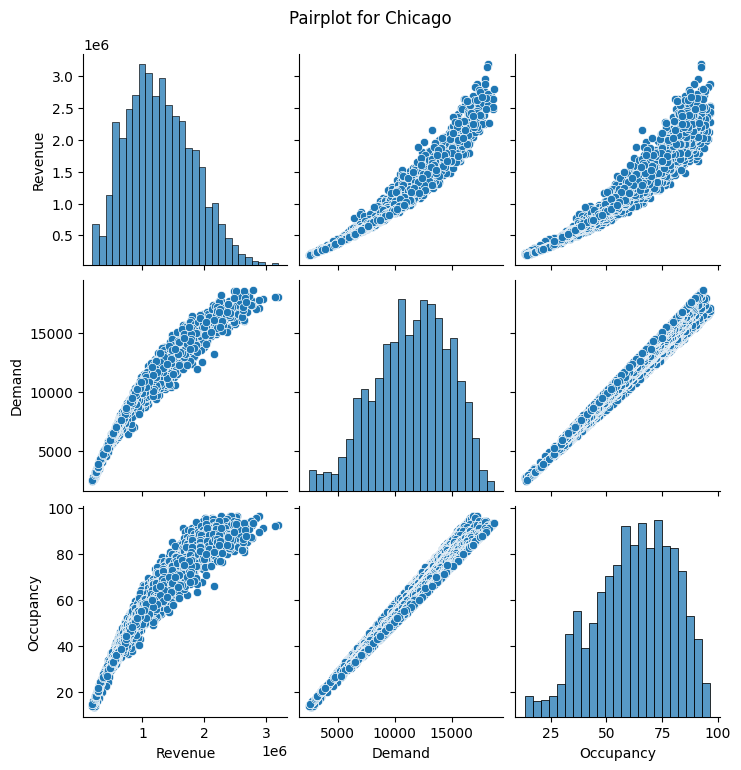

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for city
city_data = hotels[hotels['Location'] == city]

# Plot the pairplot
sns.pairplot(city_data[col_list])
plt.suptitle(f'Pairplot for {city}', y=1.02)
plt.show()


In [71]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract the first entry for each month, year, and week
total_data = city_data.resample('A').first()  # Annual data
monthly_data = city_data.resample('M').first()  # Monthly data
weekly_data = city_data.resample('W').first()  # Weekly data

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=("Total Data", "Yearly Data", "Monthly Data", "Weekly Data"))

# Total data
fig.add_trace(go.Scatter(x=city_data.index, y=city_data['Revenue'], mode='lines', name='Revenue'), row=1, col=1)
fig.add_trace(go.Scatter(x=city_data.index, y=city_data['Demand'], mode='lines', name='Demand'), row=1, col=1)
fig.add_trace(go.Scatter(x=city_data.index, y=city_data['Occupancy'], mode='lines', name='Occupancy'), row=1, col=1)

# Annual data
fig.add_trace(go.Scatter(x=total_data.index, y=total_data['Revenue'], mode='lines', name='Revenue'), row=2, col=1)
fig.add_trace(go.Scatter(x=total_data.index, y=total_data['Demand'], mode='lines', name='Demand'), row=2, col=1)
fig.add_trace(go.Scatter(x=total_data.index, y=total_data['Occupancy'], mode='lines', name='Occupancy'), row=2, col=1)

# Monthly data
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Revenue'], mode='lines', name='Revenue'), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Demand'], mode='lines', name='Demand'), row=3, col=1)
fig.add_trace(go.Scatter(x=monthly_data.index, y=monthly_data['Occupancy'], mode='lines', name='Occupancy'), row=3, col=1)

# Weekly data
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['Revenue'], mode='lines', name='Revenue'), row=4, col=1)
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['Demand'], mode='lines', name='Demand'), row=4, col=1)
fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['Occupancy'], mode='lines', name='Occupancy'), row=4, col=1)

# Update layout
fig.update_layout(height=1000, title_text=f"Data for {city}")
fig.show()

C:\Users\miror\AppData\Local\Temp\ipykernel_17716\3396649879.py:5: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.

C:\Users\miror\AppData\Local\Temp\ipykernel_17716\3396649879.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

